# PS106 Broadband Solar Irradiance from the Ice Floe Camp

## Dataset description

**Title:** Spatial and temporal variability of broadband solar irradiance during POLARSTERN cruise PS106/1 Ice Floe Camp (June 4th-16th 2017)     

**Authors** Barrientos Velasco, Carola; Deneke, Hartwig; Macke, Andreas 

**Description** The dataset is part of the expedition PS106/1 of the Research Vessel POLARSTERN to the Arctic Ocean in 2017.
During the ice floe camp (drift period, June 4th-16th 2017) 15 pyranometer stations were deployed over the ice floe covering an area of about 1 km². Each station measured broadband solar irradiance and temperature at 1Hz resolution.

Relative humidity was also measured, however its use is not recommended due to technical problems of the sensors.

Each file contains horizontal level and cleanliness flags describing the status of the pyranometer dome per day. The criterion is as follows.

Cleanliness
clean =1, drops =2, frozen =3, no observation = 4

Leveling
leveled =1, partially leveled =2, unleveled =3, no observation =4

**Year** 2018       

**Institutes** Tropos, Leipzig  

**DOI** [10.1594/PANGAEA.896710](https://doi.org/10.1594/PANGAEA.896710)        

**License**    [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/ "CC-BY-4.0")

## Contents of this notebook

This notebook provides a minimal working example of reading and plotting broadband solar irradiance data from the POLARSTERN cruise PS106/1 Ice Floe Camp (June 4th-16th 2017). The data is visualized

a.) plotting the start positions of the measurement stations

b.) plotting the measured downward irradiance against time

for one day.

## General information about this notebook

This notebook series has been initiated by the Data Management Project (INF) within the TR-172 ["ArctiC Amplification: Climate Relevant Atmospheric and SurfaCe Processes, and Feedback Mechanisms" (AC)³](http://www.ac3-tr.de/) funded by the German Research Foundation (Deutsche Forschungsgemeinschaft, DFG)

Author(s) of this notebook:
- Matthias Buschmann, [Institute of Environmental Physics](http://www.iup.uni-bremen.de), University of Bremen, Germany, m_buschmann@iup.physik.uni-bremen.de
- Jonas Hachmeister, [Institute of Environmental Physics](http://www.iup.uni-bremen.de), University of Bremen, Germany, jonas_h@iup.physik.uni-bremen.de
- Johannes Röttenbacher, [Institute of Environmental Physics](http://www.iup.uni-bremen.de), University of Bremen, Germany, jroettenbacher@iup.physik.uni-bremen.de

GitHub repository: https://github.com/ac3-tr/ac3-book

This notebook is licensed under the [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/ "CC-BY-4.0")


## Import relevant modules

The following packages are needed for the execution of this notebook:
_matplotlib_, _numpy_, _cartopy_, _xarray_

In [1]:
import cartopy.crs as ccrs
from cycler import cycler
import matplotlib.pyplot as plt
import numpy as np
import pangaeapy as pan
import xarray as xr

## Pre-processing of the imported data

The data set consists of netCDF files, which can be downloaded using the pangaeapy module. For this example we only want the first file.

In [2]:
# Get the data using pangaeapy
import nest_asyncio
nest_asyncio.apply()

In [3]:
datafolder = '/media/jr/JR_SSD/tmp/pangaeapy_cache'  # adjust this to your local environment
ds = pan.PanDataSet(896710, enable_cache=True, cachedir=datafolder)
filenames = ds.download(indices=[0])

File pyrnet_ac3-pascal_2017-06-04_all.v2.nc already exists, skipping.


### Read the downloaded NetCDF file

Let's take a look at the netCDF file.

In [4]:
fname = filenames[0]
ds = xr.open_dataset(fname)
ds

<xarray.Dataset> Size: 42MB
Dimensions:       (time: 86400, station: 15)
Coordinates:
  * time          (time) datetime64[ns] 691kB 2017-06-04T00:00:01 ... 2017-06...
  * station       (station) float32 60B 24.0 25.0 26.0 30.0 ... 42.0 43.0 44.0
    lon           (time, station) float32 5MB ...
    lat           (time, station) float32 5MB ...
Data variables:
    calibration   (station) float32 60B ...
    szen          (time, station) float32 5MB ...
    sazi          (time, station) float32 5MB ...
    esd           (station) float32 60B ...
    qcflag_level  (station) int8 15B ...
    qcflag_clean  (station) int8 15B ...
    ghi           (time, station) float64 10MB ...
    ta            (time, station) float32 5MB ...
    rh            (time, station) float32 5MB ...
    F0            (station) float32 60B ...
Attributes:
    conventions:     CF-1.7
    title:           TROPOS pyranometer network observations
    institution:     Leibniz Institute for Tropospheric Research (TROPOS)
    address:         Permoser Str. 15, 04318 Leipzig, Germany
    source:          TROPOS pyranometer station network
    contact_person:  Andreas Macke, mailto:andreas.macke@tropos.de
    author:          Carola Barrientos, mailto:barrientos@tropos.de
    comments:        Campaign: Arctic Amplification: Climate Relevant Atmosph...
    history:         Data processed from individual daily files
    license:         Creative Commons Attribution 4.0 International

If we look above, we notice that lat and lon aren't actually coordinates but variables dependent on time. They track the drift of the individual stations. So we should correct that and can then also plot a simple map of the start positions of each station for the day of the data set.
We also remove all nan values from the data set.

In [5]:
ds = ds.reset_coords(["lat", "lon"])
ds = ds.dropna('time')
ds

<xarray.Dataset> Size: 20MB
Dimensions:       (time: 40920, station: 15)
Coordinates:
  * time          (time) datetime64[ns] 327kB 2017-06-04T12:38:00 ... 2017-06...
  * station       (station) float32 60B 24.0 25.0 26.0 30.0 ... 42.0 43.0 44.0
Data variables:
    calibration   (station) float32 60B ...
    szen          (time, station) float32 2MB 60.0 60.0 60.0 ... 75.38 75.38
    sazi          (time, station) float32 2MB 201.9 201.9 201.9 ... 10.63 10.63
    esd           (station) float32 60B ...
    qcflag_level  (station) int8 15B ...
    qcflag_clean  (station) int8 15B ...
    lon           (time, station) float32 2MB 10.56 10.55 10.55 ... 10.77 10.76
    lat           (time, station) float32 2MB 81.94 81.95 81.95 ... 81.94 81.94
    ghi           (time, station) float64 5MB 431.3 424.9 411.1 ... 123.8 124.7
    ta            (time, station) float32 2MB 270.3 269.7 269.2 ... 271.9 271.7
    rh            (time, station) float32 2MB 87.52 89.28 87.73 ... 70.75 70.65
    F0            (station) float32 60B ...
Attributes:
    conventions:     CF-1.7
    title:           TROPOS pyranometer network observations
    institution:     Leibniz Institute for Tropospheric Research (TROPOS)
    address:         Permoser Str. 15, 04318 Leipzig, Germany
    source:          TROPOS pyranometer station network
    contact_person:  Andreas Macke, mailto:andreas.macke@tropos.de
    author:          Carola Barrientos, mailto:barrientos@tropos.de
    comments:        Campaign: Arctic Amplification: Climate Relevant Atmosph...
    history:         Data processed from individual daily files
    license:         Creative Commons Attribution 4.0 International

Let's figure out the maximum extents of our data for our plot.

In [6]:
min_lat, max_lat, min_lon, max_lon = np.min(ds.lat), np.max(ds.lat), np.min(ds.lon), np.max(ds.lon)
print(f'Minimum Latitude: {min_lat.to_numpy():.4f}\n'
      f'Maximum Latitude: {max_lat.to_numpy():.4f}\n'
      f'Minimum Longitude: {min_lon.to_numpy():.4f}\n'
      f'Maximum Longitude: {max_lon.to_numpy():.4f}')

Minimum Latitude: 81.9286
Maximum Latitude: 81.9564
Minimum Longitude: 10.5393
Maximum Longitude: 10.7653


[Text(0.5, 1.0, 'Start Location of Radiation Stations - 2017-06-04')]

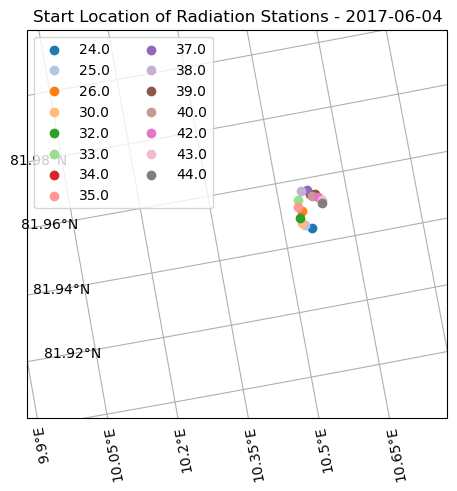

In [7]:
_, ax = plt.subplots(constrained_layout=True,
                     subplot_kw={'projection': ccrs.NorthPolarStereo()})
ax.set_prop_cycle(cycler(color=plt.get_cmap('tab20').colors))
ax.set_extent((10, 10.8, 81.9, 82))
ax.gridlines(draw_labels={"bottom": 'x', "right": "y"})
for station in ds.station:
    ds_sel = ds.sel(station=station).isel(time=0)
    ax.scatter(ds_sel.lon, ds_sel.lat, label=str(station.to_numpy()), transform=ccrs.PlateCarree())

ax.legend(ncols=2)
ax.set(
    title='Start Location of Radiation Stations - 2017-06-04',
)

## Plotting example

### Overview plot

As an overview, we can plot the global horizontal irradiance against time for each station. Since there are 15 stations we split up the plot in 4 panels for better visibility of each line.

In [8]:
par = 'ghi'
ds[par]

<xarray.DataArray 'ghi' (time: 40920, station: 15)> Size: 5MB
array([[431.292383, 424.929163, 411.140771, ..., 418.678094, 414.76803 ,
        433.535913],
       [431.440485, 424.929163, 411.140771, ..., 418.978876, 415.068811,
        433.535913],
       [430.848077, 425.081476, 411.140771, ..., 419.279626, 415.068811,
        433.068414],
       ...,
       [128.262094, 127.93567 , 120.365915, ..., 130.686517, 124.069482,
        125.136362],
       [128.113977, 127.93567 , 120.365915, ..., 130.987283, 123.919092,
        124.668848],
       [128.558298, 127.93567 , 120.220018, ..., 130.836893, 123.768709,
        124.668848]], shape=(40920, 15))
Coordinates:
  * time     (time) datetime64[ns] 327kB 2017-06-04T12:38:00 ... 2017-06-04T2...
  * station  (station) float32 60B 24.0 25.0 26.0 30.0 ... 40.0 42.0 43.0 44.0
Attributes:
    units:       W/m2
    long_name:   global horizontal irradiance
    instrument:  EKO ML-020VM

Text(0.5, 0.98, '2017-06-04')

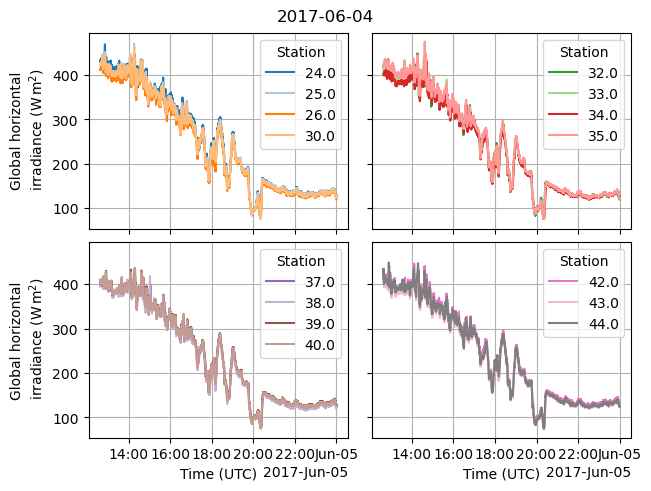

In [9]:
tab20 = plt.get_cmap('tab20')
fig, axs = plt.subplot_mosaic(
    """
    AB
    CD
    """,
    constrained_layout=True,
    sharex=True, sharey=True,
)
ax = axs['A']
for i, station in enumerate(ds.station[0:4]):
    ds[par].sel(station=station).plot(x='time', ax=ax,
                                      label=str(station.to_numpy()),
                                      color=tab20(i))
ax.set(
    xlabel='',
    ylabel='Global horizontal\n irradiance (W$\\,$m$^{2}$)',
    title='',
)

ax = axs['B']
for i, station in enumerate(ds.station[4:8]):
    ds[par].sel(station=station).plot(x='time', ax=ax,
                                      label=str(station.to_numpy()),
                                      color=tab20(i+4))
ax.set(
    xlabel='',
    ylabel='',
    title='',
)

ax = axs['C']
for i, station in enumerate(ds.station[8:12]):
    ds[par].sel(station=station).plot(x='time', ax=ax,
                                      label=str(station.to_numpy()),
                                      color=tab20(i+8))
ax.set(
    xlabel='Time (UTC)',
    ylabel='Global horizontal\n irradiance (W$\\,$m$^{2}$)',
    title='',
)

ax = axs['D']
for i, station in enumerate(ds.station[12:]):
    ds[par].sel(station=station).plot(x='time', ax=ax,
                                      label=str(station.to_numpy()),
                                      color=tab20(i+12))
ax.set(
    xlabel='Time (UTC)',
    ylabel='',
    title='',
)

for name, ax in axs.items():
    ax.grid()
    ax.legend(title='Station')

fig.suptitle('2017-06-04')